array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

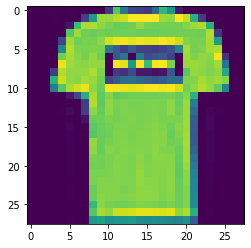

In [2]:
import keras
import numpy as np
import pandas as pd
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

import matplotlib.pyplot as plt

plt.imshow(x_train[1])

plt.imshow(x_train[1])

y_train

## For CNN, we need to do data reshaping

## data Reshaping as per channels (Here channels=1)

In [5]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1)) ### Height,weight,channels

In [9]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Normalizing data

In [11]:
x_train=x_train/255.0
x_test=x_test/255.0

### Train and validation data split

In [13]:
x_train,x_valid=x_train[:55000],x_train[55000:]
y_train,y_valid=y_train[:55000],y_train[55000:]

# Model building

In [15]:
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1))) ### Convolution layer
model.add(keras.layers.MaxPooling2D((2,2))) ### Max pooling

model.add(keras.layers.Flatten()) ### Converting higher dimension to 1D by flattening
model.add(keras.layers.Dense(300,activation='relu')) ### Hidden layer 1
model.add(keras.layers.Dense(100,activation='relu')) ### Hidden layer 2
model.add(keras.layers.Dense(10,activation='softmax')) #### Output layer

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [21]:
model_history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 34s 615us/step - loss: 0.8706 - accuracy: 0.7079 - val_loss: 0.7649 - val_accuracy: 0.7272
Epoch 2/10
55000/55000 [==============================] - 32s 578us/step - loss: 0.5335 - accuracy: 0.8074 - val_loss: 0.5136 - val_accuracy: 0.8174
Epoch 3/10
55000/55000 [==============================] - 33s 601us/step - loss: 0.4764 - accuracy: 0.8287 - val_loss: 0.5108 - val_accuracy: 0.8156
Epoch 4/10
55000/55000 [==============================] - 34s 615us/step - loss: 0.4407 - accuracy: 0.8435 - val_loss: 0.4333 - val_accuracy: 0.8366
Epoch 5/10
55000/55000 [==============================] - 34s 622us/step - loss: 0.4142 - accuracy: 0.8531 - val_loss: 0.5134 - val_accuracy: 0.8012
Epoch 6/10
55000/55000 [==============================] - 34s 612us/step - loss: 0.3936 - accuracy: 0.8578 - val_loss: 0.3964 - val_accuracy: 0.8590
Epoch 7/10
55000/55000 [==============================] -

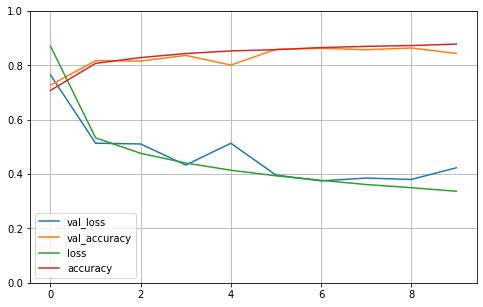

In [22]:
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 145us/step


[0.446626170873642, 0.83160001039505]

In [26]:
x_new=x_test[:3]
model.predict_classes(x_new)

array([9, 2, 1], dtype=int64)

### With callbacks,checkpoints and early stopping

In [ ]:
del model

In [29]:
keras.backend.clear_session()

In [30]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1))) ### Convolution layer
model.add(keras.layers.MaxPooling2D((2,2))) ### Max pooling

model.add(keras.layers.Flatten()) ### Converting higher dimension to 1D by flattening
model.add(keras.layers.Dense(300,activation='relu')) ### Hidden layer 1
model.add(keras.layers.Dense(100,activation='relu')) ### Hidden layer 2
model.add(keras.layers.Dense(10,activation='softmax')) #### Output layer

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=["accuracy"])

checkpoint_cb=keras.callbacks.ModelCheckpoint("cnn_early_stopped_model.h5",save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
##### Number of epochs after which no improvement after which training will be stopped
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/200
55000/55000 [==============================] - 48s 875us/step - loss: 0.7121 - accuracy: 0.7487 - val_loss: 0.4839 - val_accuracy: 0.8236
Epoch 2/200
55000/55000 [==============================] - 47s 858us/step - loss: 0.4747 - accuracy: 0.8288 - val_loss: 0.4446 - val_accuracy: 0.8388
Epoch 3/200
55000/55000 [==============================] - 49s 887us/step - loss: 0.4177 - accuracy: 0.8510 - val_loss: 0.4048 - val_accuracy: 0.8558
Epoch 4/200
55000/55000 [==============================] - 51s 919us/step - loss: 0.3815 - accuracy: 0.8631 - val_loss: 0.3960 - val_accuracy: 0.8522
Epoch 5/200
55000/55000 [==============================] - 49s 884us/step - loss: 0.3556 - accuracy: 0.8703 - val_loss: 0.3693 - val_accuracy: 0.8602
Epoch 6/200
55000/55000 [==============================] - 51s 931us/step - loss: 0.3346 - accuracy: 0.8791 - val_loss: 0.3262 - val_accuracy: 0.8832
Epoch 7/200
55000/55000 [==========================

In [31]:
del model
keras.backend.clear_session()

In [33]:
model=keras.models.load_model("cnn_early_stopped_model.h5")
print(model.evaluate(x_test,y_test))
model.predict_classes(x_new)

10000/10000 [==============================] - 2s 151us/step
[0.26197311801314355, 0.9071999788284302]


array([9, 2, 1], dtype=int64)

In [42]:
weights,biases=model.layers[5].get_weights()

In [43]:
weights.shape,biases.shape

((100, 10), (10,))

In [45]:
weights,biases

(array([[-2.41945744e-01, -1.87677756e-01,  3.17780226e-02,
          1.33966714e-01,  4.96163778e-02,  2.47394845e-01,
         -1.91668440e-02, -1.28097773e-01, -6.71298243e-03,
         -1.08456470e-01],
        [ 5.43238260e-02,  1.17132887e-02,  8.41787905e-02,
          2.38751426e-01, -2.72673458e-01,  2.82950923e-02,
         -3.57660502e-01,  3.77723187e-01, -2.72133172e-01,
          2.56184697e-01],
        [-7.25519955e-02, -2.49252334e-01, -1.68931261e-01,
         -2.61114836e-01, -1.07603244e-01, -1.60770372e-01,
          3.05694565e-02, -1.10932775e-01,  2.25293323e-01,
         -1.16205230e-01],
        [-6.59305826e-02, -1.05278879e-01, -2.69643776e-02,
         -2.50655055e-01, -1.54758602e-01,  5.77462278e-02,
          1.92342967e-01, -2.32862979e-01,  8.38516802e-02,
         -1.82378858e-01],
        [ 3.62904966e-01, -2.42536724e-01, -7.23732114e-02,
          2.34280005e-01,  2.23142460e-01, -6.97781146e-02,
         -3.76683950e-01,  1.47168979e-01,  6.076953